In [8]:
import numpy as np
from spec_id import Analyze_Stack_avgage, Likelihood_contours, Scale_model,Best_fit_model, Single_gal_fit_trueres,Get_flux
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [43]:
ids,speclist,lmass,rshift,flxr=np.array(Readfile('masslist_jan26.dat',is_float=False))
lmass,rshift,flxr=np.array([lmass,rshift,flxr]).astype(float)

IDA=[]  # all masses in sample
IDL=[]  # low mass sample
IDH=[]  # high mass sample

for i in range(len(ids)):
    if 10.0<=lmass[i] and 1<rshift[i]<1.75:
        IDA.append(i)
    if 10.931>lmass[i] and 1<rshift[i]<1.75:
        IDL.append(i)
    if 10.931<lmass[i] and 1<rshift[i]<1.75:
        IDH.append(i)

metal=np.array([ 0.0020, 0.0025, 0.0031, 0.0039, 0.0049, 0.0061,  0.0068,  0.0077,  0.0085,  0.0096,  0.0106,
                  0.012, 0.0132, 0.014,  0.0150,  0.0164, 0.018,  0.019,  0.021,  0.024, 0.027, 0.03])
bcmetal=np.array([0.0001, 0.0004, 0.004, 0.008, 0.02])
age=np.arange(.5,6.1,.1)
tau=[0,8.0,8.15,8.28,8.43,8.57,8.72,8.86,9.0,9.14,9.29,9.43,9.57,9.71,9.86,10.0]

M,A=np.meshgrid(metal,age)
BM,BA=np.meshgrid(bcmetal,age)

0.0


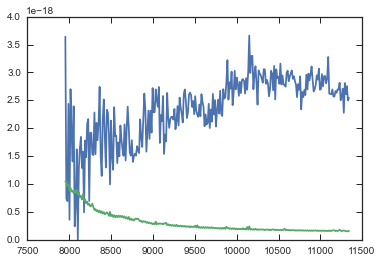

In [31]:
%matplotlib inline

fp='/Users/Vince.ec/Clear_data/extractions_nov_22/GS3/'
orientlist=glob(fp + '*-216-*40597.1D.fits')

wv,fl,er=[[],[],[]]
for i in range(len(orientlist)):
    w,f,e=Get_flux(orientlist[i])
    wv.append(w)
    fl.append(f)
    er.append(e)

wv,fl,er=np.array([wv,fl,er])
    
weights=1/er**2

flux=sum(fl*weights)/sum(weights)
error=np.sqrt(1/sum(weights))

print sum(wv[0]-wv[1])

plt.plot(wv[0],flux)
plt.plot(wv[0],error)
plt.show()
plt.close()

# dat=Table([wv[0],flux,error],names=['wv','flam','error'])
# ascii.write(dat,'spec_stacks_jan24/s40597_O3.dat')

Done!
0.03

 4.3 9.0
Best fit model is 4.3 Gyr and 0.03 Z


[  3.79588883  14.07990483]

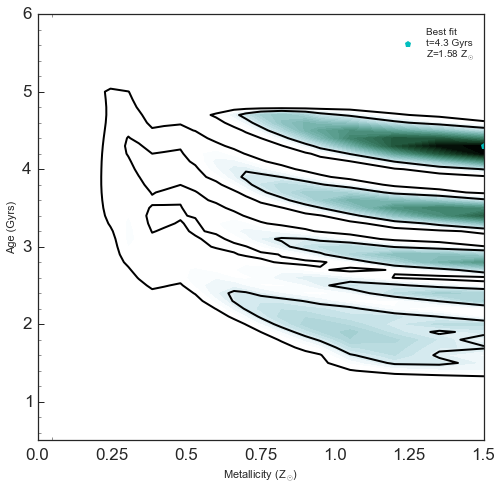

Done!
0.0164

 1.4 0
Best fit model is 2.6 Gyr and 0.0061 Z


[  4.13933925  12.8728902 ]

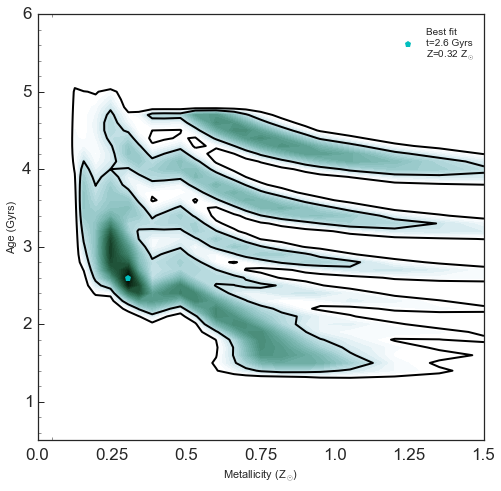

Done!
0.0031

 4.4 0
Best fit model is 4.6 Gyr and 0.0031 Z


[  3.07899823  21.09113786]

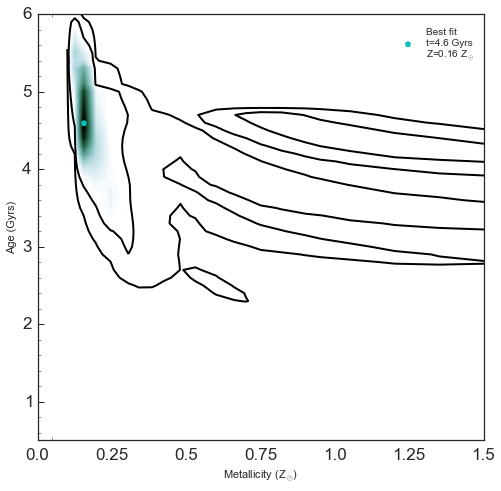

In [32]:
%matplotlib inline

Single_gal_fit_trueres('s40597_O1', 'spec_stacks_jan24/s40597_O1.dat',tau,metal,age, 1.222, 's40597_orientfit_O1')
Best_fit_model('chidat/s40597_orientfit_O1_chidata.fits',metal,age,tau)
Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/s40597_orientfit_O1_chidata.fits',np.array(tau),metal,age)
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
# levels=np.array([6.96416221, 35.23942191])
print levels
plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

Single_gal_fit_trueres('s40597_O2', 'spec_stacks_jan24/s40597_O2.dat',tau,metal,age, 1.222, 's40597_orientfit_O2')
Best_fit_model('chidat/s40597_orientfit_O2_chidata.fits',metal,age,tau)
Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/s40597_orientfit_O2_chidata.fits',np.array(tau),metal,age)
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([5.96412962,38.24929408])
plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

Single_gal_fit_trueres('s40597_O3', 'spec_stacks_jan24/s40597_O3.dat',tau,metal,age, 1.222, 's40597_orientfit_O3')
Best_fit_model('chidat/s40597_orientfit_O3_chidata.fits',metal,age,tau)
Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/s40597_orientfit_O3_chidata.fits',np.array(tau),metal,age)
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([6.80535055, 34.33608687])
plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

In [35]:
%matplotlib inline

Pr1, bfage1, bfmetal1= Analyze_Stack_avgage('chidat/s40597_orientfit_O1_chidata.fits',np.array(tau),metal,age)
Pr2, bfage2, bfmetal2= Analyze_Stack_avgage('chidat/s40597_orientfit_O2_chidata.fits',np.array(tau),metal,age)
Pr3, bfage3, bfmetal3= Analyze_Stack_avgage('chidat/s40597_orientfit_O3_chidata.fits',np.array(tau),metal,age)

PrT=Pr1*Pr2*Pr3

Best fit model is 4.3 Gyr and 0.03 Z
Best fit model is 2.6 Gyr and 0.0061 Z


Best fit model is 4.6 Gyr and 0.0031 Z

[[ 1.0458699e-662  5.0727582e-661  2.695869e-708 ...,  8.5068324e-445
   2.6291949e-405  6.6120834e-370]
 [ 2.0389914e-568  5.2641794e-593  1.1905457e-635 ...,  1.7089065e-294
   8.3895936e-269  7.8617063e-246]
 [ 4.5177202e-514  5.5199219e-555  3.2272139e-620 ...,  4.9927385e-204
   7.1087243e-185  1.3617193e-167]
 ..., 
 [ 0.0088555953  0.17862224  0.00010330941 ...,  2.5298023e-172
   6.8607273e-189  7.9341455e-206]
 [ 0.0064081333  0.028203088  9.3609491e-06 ...,  1.1360559e-174
   4.7568473e-192  8.3902436e-210]
 [ 0.00022014394  0.00018102857  2.9807177e-08 ...,  2.2284763e-178
   4.7448638e-197  3.8447007e-216]]


/Users/Vince.ec/Ureka/python/lib/python2.7/site-packages/matplotlib-1.4.2-py2.7-macosx-10.6-x86_64.egg/matplotlib/axes/_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


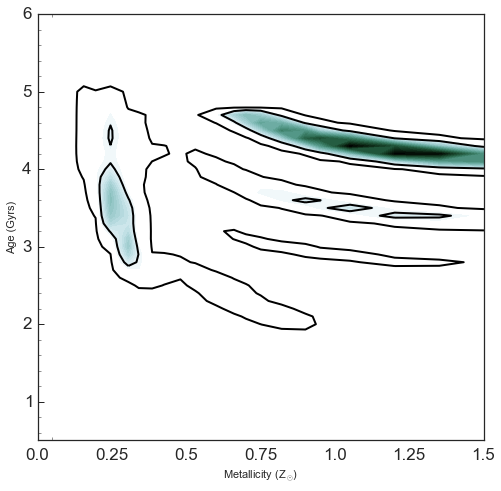

In [50]:
Age=[]
for i in range(len(PrT)):
    Age.append(np.trapz(PrT[i],metal))
    
C=np.trapz(Age,age)
print PrT
# onesig,twosig=Likelihood_contours(age,metal,PrT/C)
# levels=np.array([twosig,onesig])
# print levels
levels=np.array([ 3.35619265,  31.04478206])
plt.figure(figsize=[8,8])
plt.contour(M,A,PrT/C,levels,colors='k',linewidths=2)
plt.contourf(M,A,PrT/C,40,cmap=colmap)
# plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()